In [ ]:
# aim to find genes whose expression co-varies with lineage distance within top represented lg1 (pN028 dataset)

In [8]:
# first read in distance matrix containing pairwise lineage distances

import pandas as pd

def read_mat(fn):
    
    in_df = pd.read_csv(fn, index_col = 0)
    #print(in_df)
    
    return in_df

#corr_mat_pre_highvar = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201022_global_corr.csv")
#corr_mat_pre_highvar_scale = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201023_cat_pre_highvar_scaled.csv")
#corr_mat_post_highvar = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201023_highvar_corr_cat.csv")
#corr_mat_cc = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201023_cc_regress_corr_cat.csv")

#corr_mat_post_highvar_unscale = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201023_highvar_global_corr_cat_unscaled.csv")
#corr_mat_cc_unscale = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201023_cc_regress_corr_cat_unscaled.csv")

#cc_vs_ldist = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201025_cc_vs_ldist_cat.csv")
s_vs_ldist = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201025_S_phase_vs_ldist_cat.csv")
g2m_vs_ldist = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201025_g2m_vs_lin_dist.csv")
g1_vs_ldist = read_mat("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201025_g1_vs_lin_dist.csv")

In [4]:
print(g1_vs_ldist)

                                             phased_bool lin_dist
combinations                                                     
('TGATGCAGTTGCTCAA-1', 'TTGCTGCTCGCTACGG-1')           0     13.0
('TGATGCAGTTGCTCAA-1', 'GGGTTATCAGTAGGAC-1')           0     11.0
('TGATGCAGTTGCTCAA-1', 'ACATCGATCCTCTTTC-1')           0      7.0
('TGATGCAGTTGCTCAA-1', 'TGTGATGTCTCGCTTG-1')           0      1.0
('TGATGCAGTTGCTCAA-1', 'ACTGATGCAGGTGGAT-1')           0      5.0
...                                                  ...      ...
('ACACAGTAGGACAGTC-1', 'TACGGGCGTGTCCATA-1')           0     10.0
('ACACAGTAGGACAGTC-1', 'CCGCAAGGTATGATCC-1')           1      7.0
('ACACAGTAGGACAGTC-1', 'TCACACCGTCATAACC-1')           1     10.0
('ACACAGTAGGACAGTC-1', 'GGGTTATCAGTAGGAC-1')           1     12.0
('ACACAGTAGGACAGTC-1', 'GTCACGGTCTAGGCAT-1')           0     10.0

[116978 rows x 2 columns]


In [7]:
# for nrip3 (top hotspot hit) test heuristic, then you can scaleup across all genes

import itertools

def gex_corr(fn, in_mat):
    
    #print(in_mat.index)
    count_df = pd.read_csv(fn, index_col = 0)
    #print(count_df.loc['NRIP3'])
    NRIP3 = count_df.loc['AL357060.1']
    
    cells = list(count_df)
    
    cell_combos = list(itertools.combinations(cells, 2))
    
    combo_df = pd.DataFrame(index = cell_combos)
    
    for cell_combo in cell_combos:
        
        c1 = cell_combo[0]
        #print("cell 1 is: " + c1)
        c2 = cell_combo[1]
        #print("cell 2 is: " + c2)
    
        exp1 = NRIP3[c1]
        exp2 = NRIP3[c2]
        
        if exp1 != 0 and exp2 != 0: # requiring that the gene is expressed in both cells
            
            exp_diff = abs(exp1 - exp2) # what is the best distance metric?
        
            if c1 in in_mat.index and c2 in list(in_mat):
            
                ldist = in_mat.loc[c1, c2]
        
                combo_df.loc[cell_combo, "exp_dist"] = exp_diff
                combo_df.loc[cell_combo, "lin_dist"] = ldist
            
    return combo_df
    
test = gex_corr("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/csv/20201014_filter_df.csv", dist_mat)

                                          exp_dist  lin_dist
(TTGCATTTCAAGAATG-1, TGTCCCAAGGCGCTCT-1)  0.129075      11.0
(TTGCATTTCAAGAATG-1, CACGAATCAACTTGCA-1)  0.054397      10.0
(TTGCATTTCAAGAATG-1, ATAGACCCAAGGAGTC-1)  0.058354       7.0
(TTGCATTTCAAGAATG-1, AGTAGTCGTTCGGCGT-1)  0.250494      10.0
(TTGCATTTCAAGAATG-1, GGTGGCTTCATCGTAG-1)  0.185369      10.0
(TTGCATTTCAAGAATG-1, GTGTGATGTCCAGCAC-1)  0.096366      10.0
(TGTCCCAAGGCGCTCT-1, CACGAATCAACTTGCA-1)  0.183472      14.0
(TGTCCCAAGGCGCTCT-1, AGTAGTCGTTCGGCGT-1)  0.379569      14.0
(TGTCCCAAGGCGCTCT-1, GGTGGCTTCATCGTAG-1)  0.314444      14.0
(TGTCCCAAGGCGCTCT-1, GTGTGATGTCCAGCAC-1)  0.225441      14.0
(CACGAATCAACTTGCA-1, AGTAGTCGTTCGGCGT-1)  0.196098       5.0
(CACGAATCAACTTGCA-1, GGTGGCTTCATCGTAG-1)  0.130972       1.0
(AACAGGGGTACCGCGT-1, ATAGACCCAAGGAGTC-1)  0.243140       8.0
(AACAGGGGTACCGCGT-1, AGTAGTCGTTCGGCGT-1)  0.065708       9.0
(AACAGGGGTACCGCGT-1, GGTGGCTTCATCGTAG-1)  0.000583       9.0
(AACAGGGGTACCGCGT-1, GTG

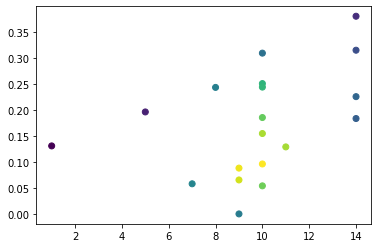

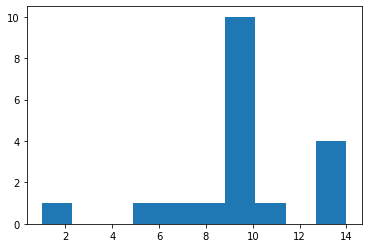

0.4490941128725212
0.41446924254833295


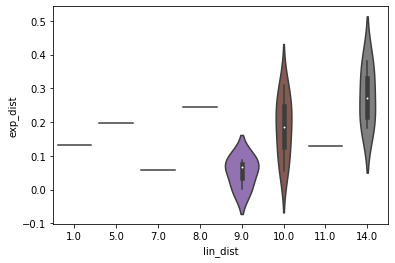

In [8]:
#print(test.dropna(how = "any"))

print(test.dropna())
test_drop = test.dropna(how = "any")
print(len(test_drop))
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
from scipy import stats
import seaborn as sns

xy = np.vstack([test_drop["lin_dist"], test_drop["exp_dist"]])
z = gaussian_kde(xy)(xy)

plt.scatter(test_drop["lin_dist"], test_drop["exp_dist"], c = z)
plt.show()
spearman = stats.spearmanr(test_drop["lin_dist"], test_drop["exp_dist"])
pearson = stats.pearsonr(test_drop["lin_dist"], test_drop["exp_dist"])
plt.hist(test_drop["lin_dist"])
plt.show()
print(spearman[0])
print(pearson[0])
plt.show()

ax = sns.violinplot(x = "lin_dist", y = "exp_dist", data = test_drop)


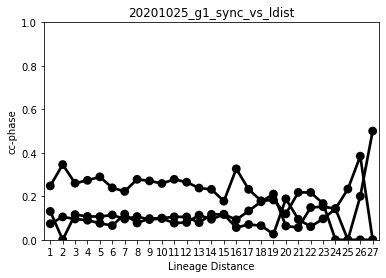

In [19]:
# automate seaborn violin viz

import seaborn as sns

from matplotlib import pyplot as plt

def vln_plot(input_df, title):

    #a4_dims = (11.7, 8.27)
    #fig, ax = plt.subplots(figsize=a4_dims)
    
    #ax = sns.violinplot(x = "lin_dist", y = "phased_bool", data = input_df, width = 1)
    #plt.hist(input_df["phased_bool"])
    #plt.show()
    sns.pointplot(x="lin_dist", y = "phased_bool", data=input_df.groupby('lin_dist', as_index=False).mean(), color = "black") #, ax=ax)
    plt.xlabel("Lineage Distance")
    plt.ylabel("cc-phase")
    plt.ylim(0, 1)
    plt.title(title)
    #plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/" + title + ".pdf", bbox_inches = "tight")
    plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/cc_combined_20201025.pdf", bbox_inches = "tight")
    #plt.show()
    
#vln_1 = vln_plot(corr_mat_cc_unscale, "corr_mat_cc_regress_unscaled")
#vln_2 = vln_plot(corr_mat_post_highvar_unscale, "corr_mat_post_highvar_unscaled")
#vln_3 = vln_plot(corr_mat_pre_highvar, "corr_mat_pre_highvar_unscaled") # this is unscaled

#vln_4 = vln_plot(corr_mat_cc, "corr_mat_cc_scaled")

#vln_5 = vln_plot(cc_vs_ldist, "20201025_cc_sync_vs_ldist")
vln_5 = vln_plot(s_vs_ldist, "20201025_s_sync_vs_ldist")
vln_6 = vln_plot(g2m_vs_ldist, "20201025_g2m_sync_vs_ldist")
vln_7 = vln_plot(g1_vs_ldist, "20201025_g1_sync_vs_ldist")
    
    

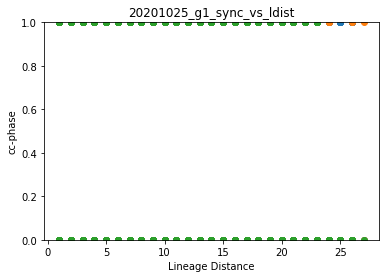

In [15]:
# automate seaborn violin viz

import seaborn as sns

from matplotlib import pyplot as plt

def vln_plot(input_df, title):

    plt.scatter(input_df["lin_dist"], input_df["phased_bool"])
    plt.xlabel("Lineage Distance")
    plt.ylabel("cc-phase")
    plt.ylim(0, 1)
    plt.title(title)
    #plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/" + title + ".pdf", bbox_inches = "tight")
    #plt.show()
    
#vln_1 = vln_plot(corr_mat_cc_unscale, "corr_mat_cc_regress_unscaled")
#vln_2 = vln_plot(corr_mat_post_highvar_unscale, "corr_mat_post_highvar_unscaled")
#vln_3 = vln_plot(corr_mat_pre_highvar, "corr_mat_pre_highvar_unscaled") # this is unscaled

#vln_4 = vln_plot(corr_mat_cc, "corr_mat_cc_scaled")

#vln_5 = vln_plot(cc_vs_ldist, "20201025_cc_sync_vs_ldist")
vln_5 = vln_plot(s_vs_ldist, "20201025_s_sync_vs_ldist")
vln_6 = vln_plot(g2m_vs_ldist, "20201025_g2m_sync_vs_ldist")
vln_7 = vln_plot(g1_vs_ldist, "20201025_g1_sync_vs_ldist")
    
    

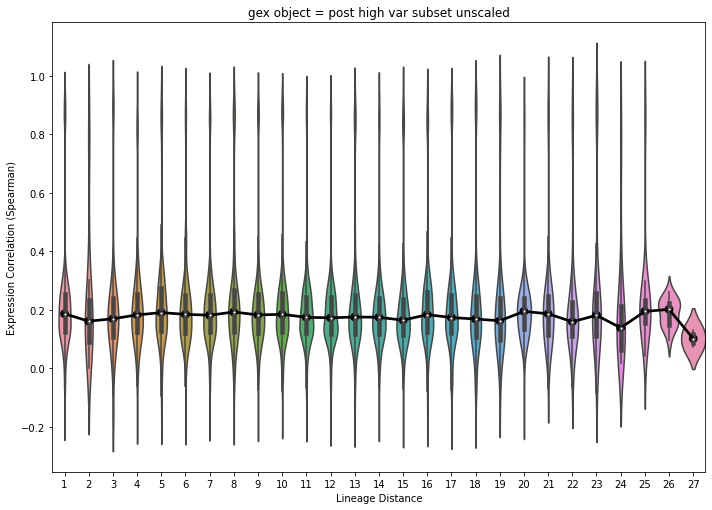

'\na4_dims = (11.7, 8.27)\nfig, ax = plt.subplots(figsize=a4_dims)\n\nax = sns.violinplot(x = "lin_dist", y = "spearman_r", data = corr_mat_pre_highvar, width = 1)\nsns.pointplot(x="lin_dist", y = "spearman_r", data=corr_mat_pre_highvar.groupby(\'lin_dist\', as_index=False).median(), color = "black", ax=ax)\nplt.xlabel("Lineage Distance")\nplt.ylabel("Expression Correlation (Spearman)")\nplt.title("gex object = pre high var subset")\nplt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_pre_highvar_spearman_line.pdf", bbox_inches = "tight")\nplt.show()\n\n\na4_dims = (11.7, 8.27)\nfig, ax = plt.subplots(figsize=a4_dims)\n\nax = sns.violinplot(x = "lin_dist", y = "spearman_r", data = corr_mat_post_highvar, width = 1)\nsns.pointplot(x="lin_dist", y = "spearman_r", data=corr_mat_post_highvar.groupby(\'lin_dist\', as_index=False).median(), color = "black", ax=ax)\nplt.xlabel("Lineage Distance")\nplt.ylabel("Expression Correlation (Spearman)")\nplt.title("gex object = post high var 

In [3]:
# violinplot of lin_distance x and dists of corrs on y

from matplotlib import pyplot as plt

import seaborn as sns

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "spearman_r", data = corr_mat_cc_unscale, width = 1)
sns.pointplot(x="lin_dist", y = "spearman_r", data=corr_mat_cc_unscale.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Spearman)")
plt.title("gex object = post high var subset unscaled")
#plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_pre_highvar_pearson_line_scaled.pdf", bbox_inches = "tight")
plt.show()


"""
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "spearman_r", data = corr_mat_pre_highvar, width = 1)
sns.pointplot(x="lin_dist", y = "spearman_r", data=corr_mat_pre_highvar.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Spearman)")
plt.title("gex object = pre high var subset")
plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_pre_highvar_spearman_line.pdf", bbox_inches = "tight")
plt.show()


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "spearman_r", data = corr_mat_post_highvar, width = 1)
sns.pointplot(x="lin_dist", y = "spearman_r", data=corr_mat_post_highvar.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Spearman)")
plt.title("gex object = post high var subset")
plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_post_highvar_spearman_line.pdf", bbox_inches = "tight")
plt.show()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "spearman_r", data = corr_mat_cc, width = 1)
sns.pointplot(x="lin_dist", y = "spearman_r", data=corr_mat_cc.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Spearman)")
plt.title("gex object = pre high var subset + cell cycle regression")
plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_pre_highvar_cc_regress_spearman_line.pdf", bbox_inches = "tight")
plt.show()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "pearson_r", data = corr_mat_pre_highvar, width = 1)
sns.pointplot(x="lin_dist", y = "pearson_r", data=corr_mat_pre_highvar.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Pearson)")
plt.title("gex object = pre high var subset")
plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_pre_highvar_pearson_line.pdf", bbox_inches = "tight")
plt.show()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "pearson_r", data = corr_mat_post_highvar, width = 1)
sns.pointplot(x="lin_dist", y = "pearson_r", data=corr_mat_post_highvar.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Pearson)")
plt.title("gex object = post high var subset")
plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_post_highvar_pearson_line.pdf", bbox_inches = "tight")
plt.show()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.violinplot(x = "lin_dist", y = "pearson_r", data = corr_mat_cc, width = 1)
sns.pointplot(x="lin_dist", y = "pearson_r", data=corr_mat_cc.groupby('lin_dist', as_index=False).median(), color = "black", ax=ax)
plt.xlabel("Lineage Distance")
plt.ylabel("Expression Correlation (Pearson)")
plt.title("gex object = pre high var subset + cell cycle regression")
plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/corr_mat_pre_highvar_cc_regress_pearson_line.pdf", bbox_inches = "tight")
plt.show()

"""




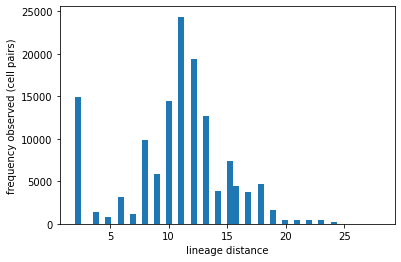

In [21]:
plt.hist(corr_mat_pre_highvar["lin_dist"], bins = 50)
plt.xlabel("lineage distance")
plt.ylabel("frequency observed (cell pairs)")
plt.savefig("/home/nwhughes/mem_seq_home/plts/20201023_lin_dist_distrubution.pdf", bbox_inches = "tight")

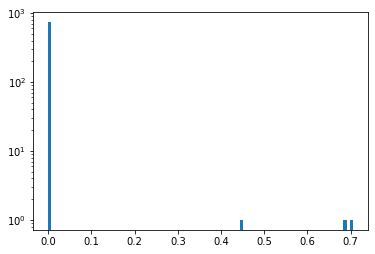

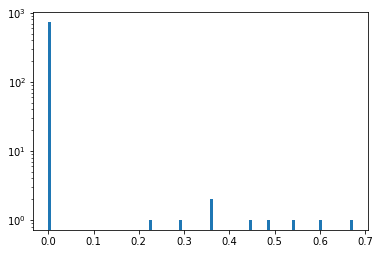

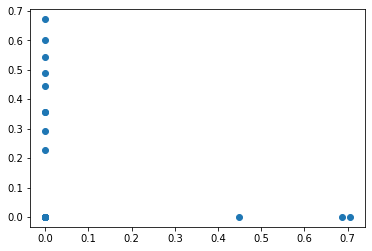

In [19]:
# is it possible to show the correlation in expression across cells of interesting genes?

def corr_exp(fn, genes):
    
    count_df = pd.read_csv(fn, index_col = 0)
    
    #print(count_df)
    
    plt.hist(count_df.loc[genes[0]], bins = 100)
    plt.yscale("log")
    plt.show()
    plt.hist(count_df.loc[genes[1]], bins = 100)
    plt.yscale("log")
    plt.show()
    plt.scatter(count_df.loc[genes[0]], count_df.loc[genes[1]])
    plt.show()
    
corr_1 = corr_exp("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/csv/20201014_filter_df.csv", ["AL356234.3", "AL357060.1"])
    
    